In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns

%matplotlib inline

In [190]:
classes = pd.read_json('MSASL_classes.json')
synonym = pd.read_json('MSASL_synonym.json')
train = pd.read_json('MSASL_train.json')
test = pd.read_json('MSASL_test.json')
val = pd.read_json('MSASL_val.json')

In [165]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16054 entries, 0 to 16053
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   org_text    16054 non-null  object 
 1   clean_text  16054 non-null  object 
 2   start_time  16054 non-null  float64
 3   signer_id   16054 non-null  int64  
 4   signer      16054 non-null  int64  
 5   start       16054 non-null  int64  
 6   end         16054 non-null  int64  
 7   file        16054 non-null  object 
 8   label       16054 non-null  int64  
 9   height      16054 non-null  int64  
 10  fps         16054 non-null  float64
 11  end_time    16054 non-null  float64
 12  url         16054 non-null  object 
 13  text        16054 non-null  object 
 14  box         16054 non-null  object 
 15  width       16054 non-null  int64  
 16  review      5169 non-null   float64
 17  avg_length  16054 non-null  float64
 18  frame_size  16054 non-null  object 
dtypes: float64(5), int64(7), 

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.]),
 <a list of 8 Text major ticklabel objects>)

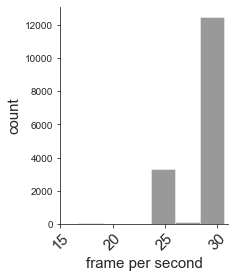

In [164]:
plt.figure(figsize=(3,4))
fps_count = train.sort_values('fps',ascending=False)
fps_count
sns.distplot(fps_count.fps, bins=10, color='k', kde=False)
sns.despine()
plt.xlim(15,31)
plt.xlabel('frame per second', size=15)
plt.xticks(rotation=45, size=15)
plt.ylabel('count', size=15)
plt.yticks()
# plt.savefig('test.png', transparent=True)


In [191]:
def eda_df(df):
    df['length'] = df.end_time - df.start_time
    df['frames'] = df.length * df.fps
    lst = []
    for i in range(len(df.width)):
        lst.append((df.width[i],df.height[i]))
    df['frame_size'] = lst

    return df[['signer_id','label','text','length','fps','frames','frame_size']]


In [192]:
train_df =eda_df(train)
test_df = eda_df(test)
val_df = eda_df(val)

train_df['group'] = 'train'
test_df['group'] = 'test'
val_df['group'] = 'val'

In [197]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25513 entries, 0 to 5286
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   signer_id   25513 non-null  int64  
 1   label       25513 non-null  int64  
 2   text        25513 non-null  object 
 3   length      25513 non-null  float64
 4   fps         25513 non-null  float64
 5   frames      25513 non-null  float64
 6   frame_size  25513 non-null  object 
 7   group       25513 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 2.4+ MB


In [193]:
all_df = pd.concat([train_df,test_df,val_df])

In [178]:
def frame_size_plot(df):
    plt.figure(figsize=(3,4))
    frame_ct = df.groupby('frame_size').count().reset_index()[['frame_size','file']].sort_values('file', ascending=True)
    sns.barplot(x='file',y='frame_size', data=frame_ct, color='black', alpha=1)
    sns.despine()

    plt.xlabel('count', size=15)
    plt.xticks(rotation=45, size=15)
    plt.ylabel('frame size', size=15)
    plt.yticks()


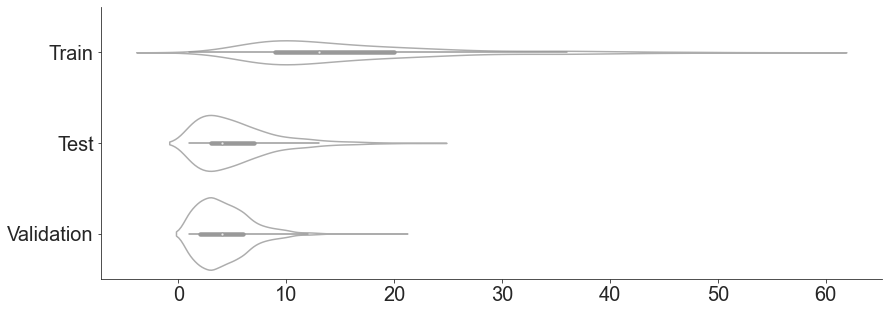

In [339]:
plt.figure(figsize=(14,5))
group_df_text = all_df.groupby(['group','text']).count().reset_index().sort_values(['signer_id'], ascending=False)
ax = sns.violinplot(x='signer_id', y='group',color='white', data=group_df_text, alpha=.4)
sns.despine()
plt.setp(ax.collections, alpha=.8)
plt.ylabel('')
plt.yticks([0, 1, 2], ['Train', 'Test', 'Validation'], size=20)
plt.xlabel('')
plt.xticks(size=20)
plt.savefig('test.png', transparent=True)


In [275]:
trdf = train_df.groupby('text').count().reset_index().sort_values('signer_id', ascending=False)[['text','fps']]
tsdf = test_df.groupby('text').count().reset_index().sort_values('signer_id', ascending=False)[['text','fps']]
vadf = val_df.groupby('text').count().reset_index().sort_values('signer_id', ascending=False)[['text','fps']]

In [282]:
def classsPlot(df):
    plt.figure(figsize=(8,6))
    sns.barplot(x='fps', y='text', data=df[:20], color='#ffb24f')
    sns.despine()
    plt.ylabel('')
    plt.yticks(size=15)
    plt.xlabel('')
    plt.xticks(size=15)

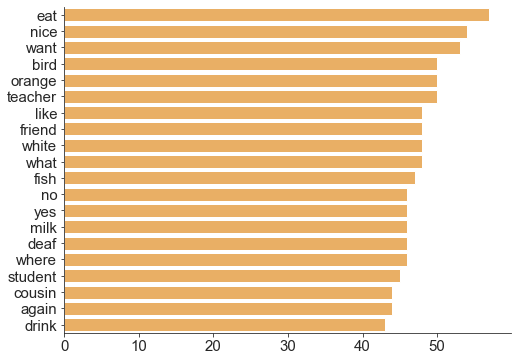

In [283]:
classsPlot(trdf)

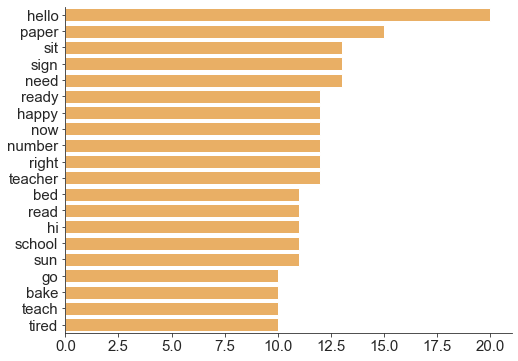

In [284]:
classsPlot(tsdf)

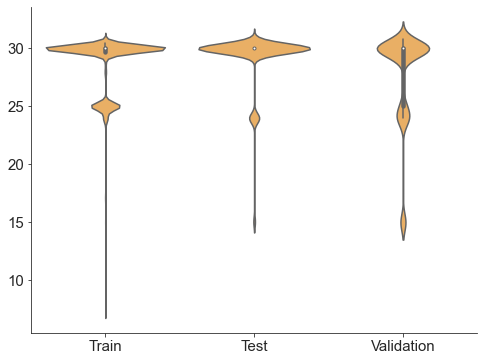

In [250]:
plt.figure(figsize=(8,6))
sns.violinplot(x='group',y='fps', data=all_df, color='#ffb24f')
sns.despine()
plt.ylabel('')
plt.yticks(size=15)
plt.xlabel('')
plt.xticks([0, 1, 2], ['Train', 'Test', 'Validation'], size=15)
plt.savefig('fpsvio.png')

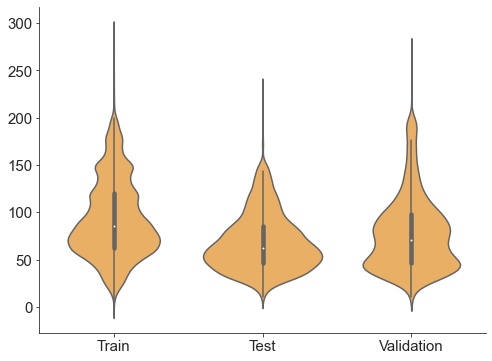

In [251]:
plt.figure(figsize=(8,6))
sns.violinplot(x='group',y='frames',color='#ffb24f', data=all_df)
sns.despine()
plt.ylabel('')
plt.yticks(size=15)
plt.xlabel('')
plt.xticks([0, 1, 2], ['Train', 'Test', 'Validation'], size=15)
plt.savefig('vidframsvio.png')

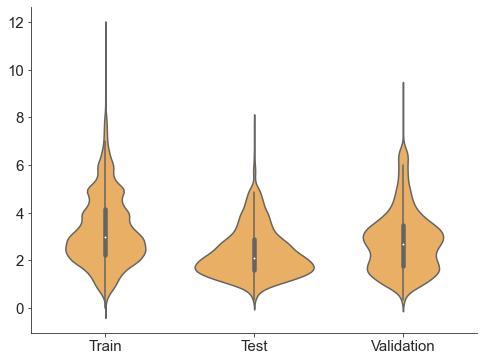

In [247]:
plt.figure(figsize=(8,6))
sns.violinplot(x='group',y='length', data=all_df, color='#ffb24f', size=15)
sns.despine()
plt.ylabel('')
plt.yticks(size=15)
plt.xlabel('')
plt.xticks([0, 1, 2], ['Train', 'Test', 'Validation'], size=15)
plt.savefig('vidlengthvio.png')

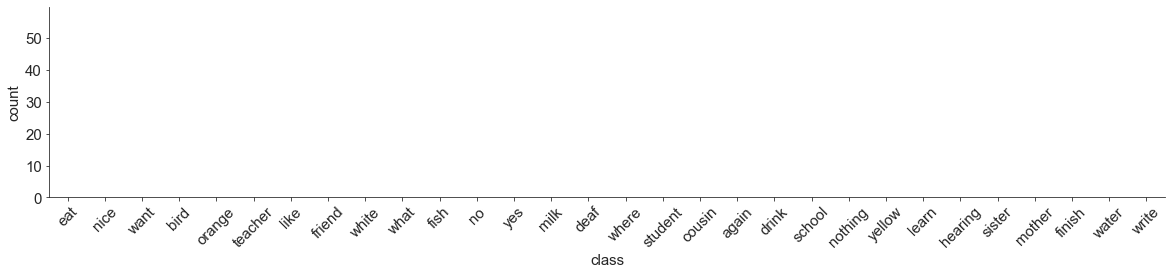

In [151]:
plt.figure(figsize=(20,5))
count_ = train.groupby('text').count().reset_index()[['text','label']].sort_values('label', ascending=False)
sns.barplot(x='text', y='label', data=count_[:30], color='white', alpha=.6)
sns.despine()
# plt.title('Top 30 Classes by Count', size=24, color='white')
plt.xlabel('class', size=15)
plt.xticks(rotation=45, size=15)
plt.ylabel('count', size=15)
plt.yticks(size=15)
plt.gcf().subplots_adjust(bottom=0.35)
plt.savefig('test.png',transparent=True)

In [ ]:
Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'